In [65]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [41]:
sns.set_palette("Accent")
sns.set_style("darkgrid")

In [119]:
dados = pd.read_csv('ACTIVITY_STAGE_1566748201008.csv')
del dados['date']
del dados['start']
del dados['stop']
dados.columns = ['distancia', 'calorias', 'passos']
dados = dados.query('passos > 0')

In [118]:
dados.sample(5)

,distancia,calorias,passos
33,106,3,166
1245,1129,39,1377
51,262,8,408
48,64,2,101
528,226,6,352


In [120]:
dados.describe().round(2)

,distancia,calorias,passos
count,1420.00,1420.00,1420.00
mean,305.14,8.98,432.76
std,318.35,10.42,413.82
min,19.00,1.00,30.00
25%,99.75,3.00,155.75
50%,159.50,4.00,247.50
75%,477.75,14.00,662.00
max,3383.00,122.00,4255.00


In [121]:
dados.corr().round(4)

,distancia,calorias,passos
distancia,1.0000,0.9912,0.9953
calorias,0.9912,1.0000,0.9771
passos,0.9953,0.9771,1.0000


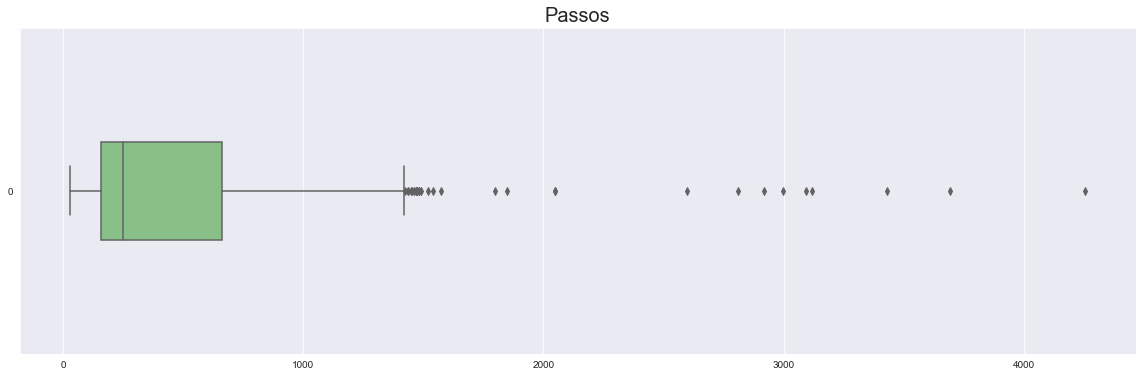

In [122]:
ax = sns.boxplot(data = dados['passos'], orient = 'h', width = 0.3)
ax.figure.set_size_inches(20, 6)
ax.set_title('Passos', fontsize=20)
ax

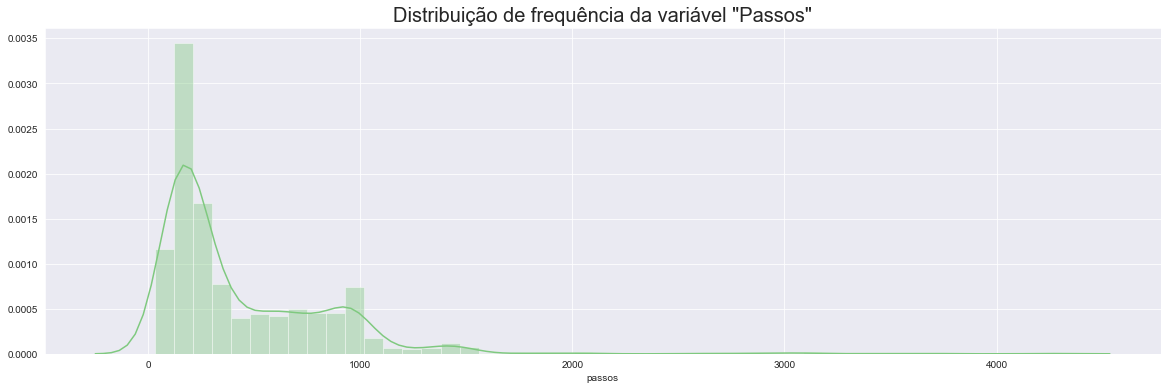

In [123]:
ax = sns.distplot(dados['passos'])
ax.figure.set_size_inches(20, 6)
ax.set_title('Distribuição de frequência da variável "Passos"', fontsize = 20)
ax

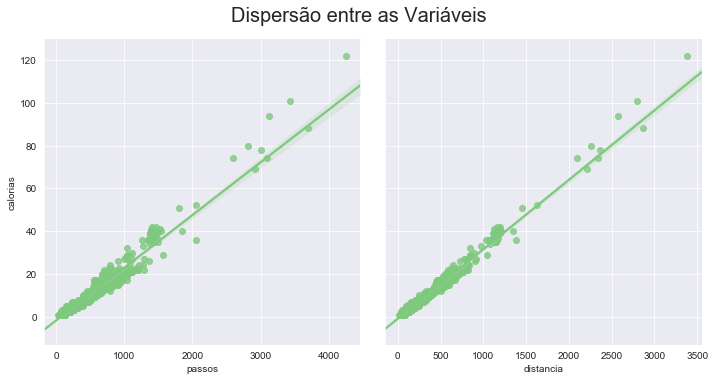

In [124]:
ax = sns.pairplot(dados, y_vars = 'calorias', x_vars = ['passos', 'distancia'], kind = 'reg', height = 5)
ax.fig.suptitle('Dispersão entre as Variáveis', fontsize=20, y=1.05)
ax

In [128]:
y = dados['calorias']

In [127]:
X = dados[['passos', 'distancia']]

In [129]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 3306)

In [77]:
modelo = LinearRegression()

In [130]:
modelo.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [131]:
print('R² = {}'.format(modelo.score(X_train, y_train)))

R² = 0.992238633269695


In [132]:
y_previsto = modelo.predict(X_test)

In [133]:
y_previsto_train = modelo.predict(X_train)
residuo = y_train - y_previsto_train

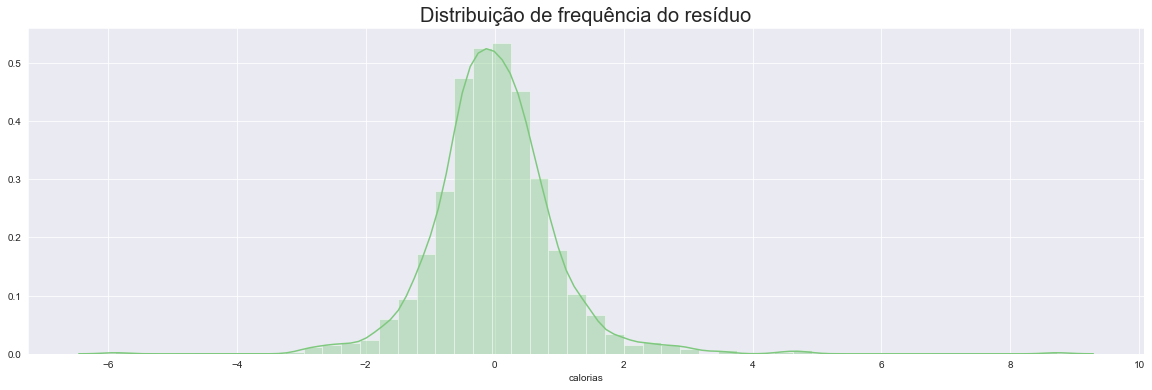

In [134]:
ax = sns.distplot(residuo)
ax.figure.set_size_inches(20, 6)
ax.set_title('Distribuição de frequência do resíduo', fontsize = 20)
ax

In [162]:
dados_predict = pd.DataFrame(columns = ['passos', 'distancia'], data = [[6781, 4830]])
modelo.predict(dados_predict)

array([143.57956172])

In [153]:
modelo.intercept_

0.021270306047387777